In [14]:
import searoute
import pandas as pd
import random
import folium

In [15]:
ports_df = pd.read_csv('Data.csv')                                      # Load the ports data from CSV

ports_df.head(3)

,World Port Index Number,Region Name,Main Port Name,Alternate Port Name,UN/LOCODE,Country Code,World Water Body,Sailing Direction or Publication,Publication Link,Standard Nautical Chart,...,Supplies - Fuel Oil,Supplies - Diesel Oil,Supplies - Aviation Fuel,Supplies - Deck,Supplies - Engine,Repairs,Dry Dock,Railway,Latitude,Longitude
0,7950.0,United States E Coast -- 6585,Maurer,,,United States,North Atlantic Ocean,U.S. Coast Pilot 2 - Atlantic Coast: Cape Cod ...,https://nauticalcharts.noaa.gov/publications/c...,12331,...,Yes,Yes,Unknown,Yes,Yes,Moderate,Unknown,Unknown,40.533333,-74.250000
1,52235.0,Sulawesi -- 51970,Mangkasa Oil Terminal,,,Indonesia,Teluk Bone; Banda Sea; South Pacific Ocean,Sailing Directions Pub. 163 (Enroute) - Borneo...,https://msi.geo.nga.mil/api/publications/downl...,,...,No,No,Unknown,No,No,NaN,Unknown,Unknown,-2.733333,121.066667
2,47620.0,Madagascar -- 47350,Iharana,,,Madagascar,Indian Ocean,Sailing Directions Pub. 171 (Enroute) - East A...,https://msi.geo.nga.mil/api/publications/downl...,61560,...,No,No,Unknown,No,No,Emergency Only,Unknown,Unknown,-13.350000,50.000000


In [16]:
# src/route_generator.py
import pandas as pd
import random
from searoute import searoute

def load_ports(csv_path="Data.csv"):
    return pd.read_csv(csv_path)

def select_ports(ports_df):
    return ports_df.sample(2)

def generate_route(port1, port2):
    return searoute((port1['longitude'], port1['latitude']), (port2['longitude'], port2['latitude']))


###### General
######  AIS (Automatic Identification System) is a communication system that allows ships to automatically exchange information such as vessel identification, position, course, and speed. This information is transmitted via VHF radio and can be received by other ships and coastal stations, allowing them to accurately determine the location and movement of nearby vessels. AIS is often used for collision avoidance, traffic management, and search and rescue operations. AIS messages are often transmitted via NMEA 0183.

######  NMEA (National Marine Electronics Association) is an organization that develops and maintains standards for the interface of marine electronic equipment. NMEA 0183 is a standard for communicating marine instrument data between equipment on a boat. It defines the electrical interface and data protocol for sending data between marine instruments such as GPS, sonar, and autopilot.

######  Here is an example of an AIS sentence:

######  !AIVDM,1,1,,B,15MwkT1P37G?fl0EJbR0OwT0@MS,0*4E

######  This AIS sentence is known as a "Position Report" message and is used to transmit information about a vessel's position, course, and speed. AIS messages are transmitted in digital format and consist of a series of comma-separated fields that contain different types of data. Here is a breakdown of each field in this particular sentence:

######  !AIVDM: This field indicates that the sentence is an AIS message in the "VDM" (VDO Message) format.
######  1,1: These fields indicate the total number of sentences in the message and the current sentence number, respectively. In this case, the message consists of a single sentence.
######  : This field is left blank. This field can contain the sequence number.
######  B: This field indicates the communication channel being used to transmit the message. In this case, the channel is "B".
######  15MwkT1P37G?fl0EJbR0OwT0@MS: This field contains the payload of the message, which is encoded using a variant of ASCII known as "Six-bit ASCII". The payload contains information such as the vessel's identification, position, course, and speed. 0*4E: This field is a checksum that is used to verify the integrity of the sentence.
######  pyais is a Python modul to encode and decode AIS messages.

In [17]:
import time
import uuid
from pyais import encode_msg
from datetime import datetime

In [1]:
# MMSI number (Maritime Mobile Service Identity)
# UUID (Universally Unique Identifier)

In [ ]:

### Purpose: Generate a list of position reports from a sequence of waypoints at a constant interval

def simulate_positions(waypoints, speed_knots=10, interval_minutes=5):
    
    positions = []
    mmsi = int(str(uuid.uuid4().int)[:9])                # Assigns a random 9-digit MMSI using uuid

    for i, (lon, lat) in enumerate(waypoints):
        timestamp = datetime.utcnow().isoformat()      # Loops through the given waypoints (lon, lat) and assigns a UTC timestamp to each
        positions.append({
            "mmsi": mmsi,                              # MMSI is used to uniquely identify the simulated vessel (unique vessel ID)
            "lat": lat,
            "lon": lon,
            "timestamp": timestamp,
        })
    return positions                                   # Returns a list of dictionaries, each containing mmsi, lat, lon, timestamp

### Generated waypoints for a vessel route.
### Simulated AIS positions at regular intervals with simulate_positions()

In [ ]:
### Purpose: Encodes a position dictionary into an AIS AIVDM NMEA sentence

def encode_ais(position):                            # Calls pyais.encode_msg with type 1 AIS message, passing mmsi, lat, lon
    return encode_msg({                              # encode_msg() — a function provided by the pyais library — to create an AIS message
        'msg_type': 1,                               # 'msg_type': 1 → Type 1 = Position Report for Class A shipborne equipment
        'mmsi': position['mmsi'],
        'lat': position['lat'],
        'lon': position['lon']
    }).as_nmea()                                     # Returns the result as NMEA string using .as_nmea()

# to convert it into an NMEA 0183 AIVDM sentence (a standard string format used in marine communication)

### Encoded AIS messages into AIVDM format using pyais

In [20]:
import asyncio
import json
import websockets
# from src.ais_simulator import simulate_positions
# from src.websocket_server import start_server

###### A WebSocket server is a type of server that enables real-time, two-way communication between a client (like a web browser or app) and the server over a single, long-lived connection.

###### Unlike HTTP, which is request-response based (the client must ask, the server replies), WebSockets allow:

###### 1. Full-duplex communication — both the client and server can send messages at any time.

###### 2. Persistent connection — no need to re-establish the connection for each message.

###### 3. Low latency — ideal for live data like chat apps, games, or streaming sensor data (like AIS).

In [ ]:

### Purpose: Launch a WebSocket server that sends AIS messages at a speed-adjusted interval

# playback_server - which is asynchronous - designed to handle non-blocking, I/O-bound tasks
# such as waiting, sending data, and talking to clients — all without freezing the program

# uses async/await to stream messages in real-time or faster

async def playback_server(positions, speed=1.0):
    async def send(websocket, path):
        for pos in positions:
            message = {
                "message": "AIVDM",
                "mmsi": pos['mmsi'],
                "timestamp": pos['timestamp'],
                "payload": encode_ais(pos)
            }
            await websocket.send(json.dumps(message))                       # Converts the message to a JSON string and sends it over the WebSocket connection asynchronously
            if speed > 0:
                await asyncio.sleep(300 / speed)  # 5 min in seconds        # Wait Before Sending the Next Message:
    return await websockets.serve(send, "localhost", 8765)

# In main script
# waypoints = [(10.0, 45.0), (12.0, 46.0)]  # Example
# positions = simulate_positions(waypoints)
# asyncio.run(start_server(positions, speed=2.0))

### Broadcasted AIS messages over a WebSocket server using websockets, with support for simulation speed adjustment

In [ ]:
# Database Schema with SQLAlchemy (models.py) -  to stores AIS messages and supports time-based queries

# SQLAlchemy lets you treat your database like a Python-powered data layer — clean, consistent, and adaptable — while still giving you full SQL control when you need it

from sqlalchemy import Column, String, Float, DateTime, create_engine
from sqlalchemy.ext.declarative import declarative_base

Base = declarative_base()

class AISMessage(Base):                                         # Defines a SQLAlchemy ORM model AISMessage
    __tablename__ = 'ais_messages'
    mmsi = Column(String, primary_key=True)                     # Primary key is composite (mmsi + timestamp): uniquely identifies each AIS report
    timestamp = Column(DateTime, primary_key=True)
    lat = Column(Float)
    lon = Column(Float)
    payload = Column(String)                      # Stores: MMSI, timestamp, lat, lon, Raw payload (for audit/debug)


C:\Users\RINURAGAVI\AppData\Local\Temp\ipykernel_51440\4068109612.py:5: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base()


In [ ]:
# Database Initialization (init_db.py)
# Creates SQLite database and tables defined by SQLAlchemy ORM.

def init_db(uri="sqlite:///ais.db"):             # Use SQLite as the database, Store the database in a file called ais.db in the current directory        
    engine = create_engine(uri)                  # engine is responsible for managing the connection between your Python code and the database
    Base.metadata.create_all(engine)

In [24]:
import json
import websockets
from sqlalchemy.orm import sessionmaker
# from pyais.stream import AISStream
from pyais import decode

# decoded = decode(data['payload'])
# print(decoded)

In [25]:
# WebSocket Receiver / Ingestion Pipeline (websocket_client.py)

async def receiver(uri="ws://localhost:8765"):                         # Connects to your AIS simulation WebSocket server
    async with websockets.connect(uri) as websocket:
        while True:
            data = json.loads(await websocket.recv())                  # Receives JSON messages
            try:
                decoded = AISStream.from_string(data['payload']).decode()         # Decodes AIS payload using pyais
                # Insert into DB
            except Exception as e:
                print("Error parsing message:", e)


In [26]:
# Analytics Script (analytics.py)

from geopy.distance import geodesic

# Uses geopy to calculate cumulative nautical miles between AIS points

def calculate_distance(points):
    total = 0
    for i in range(1, len(points)):
        total += geodesic(
            (points[i-1].lat, points[i-1].lon),
            (points[i].lat, points[i].lon)
        ).nautical
    return total


### List of Sea ports

In [9]:
import pandas as pd

ports_df = pd.read_csv("Data.csv")   

ports_df = ports_df.dropna(subset=["Country Code"])                                 # Drop rows with missing Country Code to avoid NaNs in the result

unique_country_codes = ports_df["Country Code"].unique()                            # Get unique country codes

print(unique_country_codes)


['United States' 'Indonesia' 'Madagascar' 'Tanzania' 'Vanuatu'
 'Papua New Guinea' 'Palau' 'Federated States of Micronesia' 'Turkey'
 'Canada' 'Gibraltar' 'Norway' 'Brazil' 'Saudi Arabia' 'Latvia' 'Denmark'
 'Ukraine' 'Saint Helena, Ascension, and Tristan da Cunha' 'Thailand'
 'Greece' 'United Kingdom' 'Spain' 'Italy' 'Iran' 'Norfolk Island'
 'Malaysia' 'Sudan' 'Philippines' 'Russia' 'Algeria' 'Senegal'
 'Equatorial Guinea' 'Chile' 'India' 'Antarctica' 'Greenland' 'Nigeria'
 'Gabon' 'New Zealand' 'Kiribati' 'Sweden' 'China' 'South Korea' 'Japan'
 'France' 'Sint Maarten' 'Egypt' 'French Polynesia' 'Taiwan' 'Burma'
 'United Arab Emirates' 'Dominican Republic' 'Cambodia' 'Wake Island'
 'Reunion' 'Poland' 'Honduras' 'Angola'
 'South Georgia and South Sandwich Islands' 'Guinea' 'Guinea-Bissau'
 'Ireland' 'Croatia' 'Faroe Islands' 'Belgium' 'Netherlands' 'Germany'
 'The Bahamas' 'Puerto Rico' 'Cuba' 'Israel' 'Somalia' 'Kenya' 'Romania'
 'Monaco' 'Libya' 'Portugal' 'Congo (Brazzaville)' 'Libe

In [10]:
import pandas as pd

ports_df = pd.read_csv("Data.csv")

australia_ports = ports_df[ports_df['Country Code'].str.lower() == 'australia']  # Filter ports where Country Code is australia (case-insensitive just in case)

australia_ports.head(3)


,World Port Index Number,Region Name,Main Port Name,Alternate Port Name,UN/LOCODE,Country Code,World Water Body,Sailing Direction or Publication,Publication Link,Standard Nautical Chart,...,Supplies - Fuel Oil,Supplies - Diesel Oil,Supplies - Aviation Fuel,Supplies - Deck,Supplies - Engine,Repairs,Dry Dock,Railway,Latitude,Longitude
329,54943.0,Tasmania -- 54700,Beauty Point,,AU BYP,Australia,Bass Strait; South Pacific Ocean,Sailing Directions Pub. 127 (Enroute) - East C...,https://msi.geo.nga.mil/api/publications/downl...,,...,Yes,Yes,Unknown,Unknown,Unknown,Limited,Unknown,Unknown,-41.150000,146.816667
447,54325.0,Australia -- 53290,Port Bonython,Stony Point,AU PBY,Australia,Spencer Gulf; Indian Ocean,Sailing Directions Pub. 175 (Enroute) - North ...,https://msi.geo.nga.mil/api/publications/downl...,,...,No,No,Unknown,Unknown,Unknown,Limited,Unknown,Unknown,-33.016667,137.766667
451,54290.0,Australia -- 53290,Port Pirie,,AU PPI,Australia,Spencer Gulf; Indian Ocean,Sailing Directions Pub. 175 (Enroute) - North ...,https://msi.geo.nga.mil/api/publications/downl...,,...,Unknown,Yes,Unknown,No,No,Limited,Unknown,Small,-33.183333,138.016667


In [34]:
import pandas as pd

ports_df = pd.read_csv("Data.csv")

UAE_ports = ports_df[ports_df['Country Code'].str.lower() == 'united arab emirates']  # Filter ports where Country Code is UAE (case-insensitive just in case)

UAE_ports.head(3)

,World Port Index Number,Region Name,Main Port Name,Alternate Port Name,UN/LOCODE,Country Code,World Water Body,Sailing Direction or Publication,Publication Link,Standard Nautical Chart,...,Supplies - Fuel Oil,Supplies - Diesel Oil,Supplies - Aviation Fuel,Supplies - Deck,Supplies - Engine,Repairs,Dry Dock,Railway,Latitude,Longitude
127,48272.0,United Arab Emirates -- 48260,Sharjah Offshore Terminal,Hamriyah Oil Terminal,,United Arab Emirates,Persian Gulf; Indian Ocean,Sailing Directions Pub. 172 (Enroute) - Red Se...,https://msi.geo.nga.mil/api/publications/downl...,62406,...,No,No,Unknown,Unknown,Unknown,NaN,Unknown,Unknown,25.583333,55.40
546,48276.0,United Arab Emirates -- 48260,Mina Jabal Ali,Mina Jebel Ali,AE JEA,United Arab Emirates,Persian Gulf; Indian Ocean,Sailing Directions Pub. 172 (Enroute) - Red Se...,https://msi.geo.nga.mil/api/publications/downl...,62464,...,Yes,Yes,Unknown,No,No,Major,Unknown,Unknown,25.016667,55.05
547,48275.0,United Arab Emirates -- 48260,Dubayy,Dubai; Mina Rashid,AE DXB,United Arab Emirates,Persian Gulf; Indian Ocean,Sailing Directions Pub. 172 (Enroute) - Red Se...,https://msi.geo.nga.mil/api/publications/downl...,62446,...,Yes,Yes,Unknown,Yes,Yes,Major,Large,Unknown,25.266667,55.30


In [10]:
import pandas as pd

ports_df = pd.read_csv("Data.csv")

USA_ports = ports_df[ports_df['Country Code'].str.lower() == 'united states']  # Filter ports where Country Code is USA (case-insensitive just in case)

USA_ports.head(3)

,World Port Index Number,Region Name,Main Port Name,Alternate Port Name,UN/LOCODE,Country Code,World Water Body,Sailing Direction or Publication,Publication Link,Standard Nautical Chart,...,Supplies - Fuel Oil,Supplies - Diesel Oil,Supplies - Aviation Fuel,Supplies - Deck,Supplies - Engine,Repairs,Dry Dock,Railway,Latitude,Longitude
0,7950.0,United States E Coast -- 6585,Maurer,,,United States,North Atlantic Ocean,U.S. Coast Pilot 2 - Atlantic Coast: Cape Cod ...,https://nauticalcharts.noaa.gov/publications/c...,12331,...,Yes,Yes,Unknown,Yes,Yes,Moderate,Unknown,Unknown,40.533333,-74.250000
18,7010.0,United States E Coast -- 6585,New Harbor,,,United States,North Atlantic Ocean,U.S. Coast Pilot 1 - Atlantic Coast: Eastport ...,https://nauticalcharts.noaa.gov/publications/c...,13301,...,Unknown,Yes,Unknown,Yes,Yes,Limited,Unknown,Unknown,43.866667,-69.483333
21,4950.0,US Lake Michigan -- 4570,Depere,,,United States,Lake Michigan; Great Lakes,U.S. Coast Pilot 6 - Great Lakes and their con...,https://nauticalcharts.noaa.gov/publications/c...,14918,...,Yes,Yes,Unknown,Yes,Yes,Unknown,Unknown,Unknown,44.450000,-88.066667


In [33]:

ports_df = pd.read_csv("Data.csv")

india_ports = ports_df[ports_df['Country Code'].str.lower() == 'india']     # Filter ports where Country Code is India (case-insensitive just in case)

india_ports.head(3)



,World Port Index Number,Region Name,Main Port Name,Alternate Port Name,UN/LOCODE,Country Code,World Water Body,Sailing Direction or Publication,Publication Link,Standard Nautical Chart,...,Supplies - Fuel Oil,Supplies - Diesel Oil,Supplies - Aviation Fuel,Supplies - Deck,Supplies - Engine,Repairs,Dry Dock,Railway,Latitude,Longitude
92,49460.0,India East Coast -- 49310,Machilipatnam,,,India,Bay of Bengal; Indian Ocean,Sailing Directions Pub. 173 (Enroute) - India ...,https://msi.geo.nga.mil/api/publications/downl...,63280,...,Unknown,Unknown,Unknown,Unknown,Unknown,Limited,Unknown,Small,16.150000,81.166667
587,48620.0,India West Coast -- 48610,Mandvi,,IN MDV,India,Arabian Sea; Indian Ocean,Sailing Directions Pub. 173 (Enroute) - India ...,https://msi.geo.nga.mil/api/publications/downl...,63062,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,22.833333,69.350000
1744,48790.0,India West Coast -- 48610,Hazira,,IN HZA,India,Arabian Sea; Indian Ocean,Sailing Directions Pub. 173 (Enroute) - India ...,https://msi.geo.nga.mil/api/publications/downl...,63091,...,No,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,21.083333,72.633333


### Trying to plot the Sea route

In [ ]:
import searoute as sr

origin = [146.816667, -41.150000]
destination = [69.350000, 22.833333]

route = sr.searoute(origin, destination)
# > Returns a GeoJSON LineString Feature
# show route distance with unit
print("{:.1f} {}".format(route.properties['length'], route.properties['units']))

# Optionally, define the units for the length calculation included in the properties object.
# Defaults to km, can be can be 'm' = meters 'mi = miles 'ft' = feet 'in' = inches 'deg' = degrees
# 'cen' = centimeters 'rad' = radians 'naut' = nautical 'yd' = yards
routeMiles = sr.searoute(origin, destination, units="mi")

11198.8 km


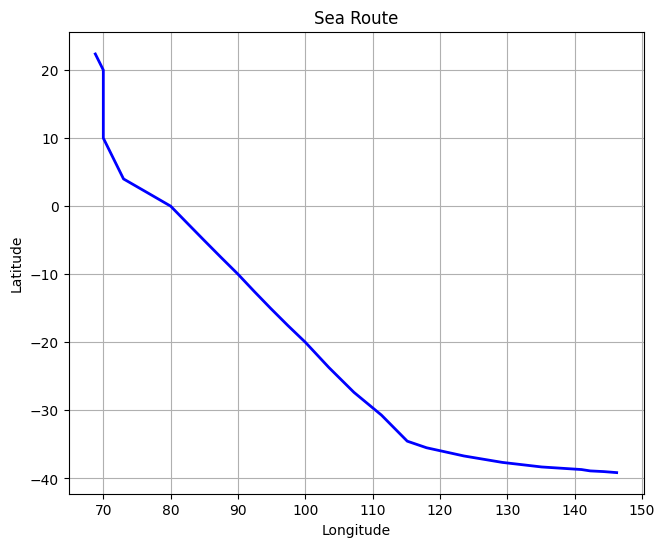

In [ ]:
import searoute as sr
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import shape

# Define origin and destination
origin = [146.816667, -41.150000]
destination = [69.350000, 22.833333]

# Get sea route (GeoJSON LineString Feature)
route = sr.searoute(origin, destination)

# Convert GeoJSON to shapely geometry
line_geom = shape(route['geometry'])

# Wrap in a GeoDataFrame
gdf = gpd.GeoDataFrame(index=[0], geometry=[line_geom], crs="EPSG:4326")

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
gdf.plot(ax=ax, color='blue', linewidth=2)
plt.title("Sea Route")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


### Dubai to chennai

In [36]:
import searoute as sr

origin = [55.30, 25.266667]                    # Dubayy - United Arab Emirates
destination = [80.300000, 13.100000]                # Chennai - India East coast

route = sr.searoute(origin, destination)
# > Returns a GeoJSON LineString Feature
# show route distance with unit
print("{:.1f} {}".format(route.properties['length'], route.properties['units']))

# Optionally, define the units for the length calculation included in the properties object.
# Defaults to km, can be can be 'm' = meters 'mi = miles 'ft' = feet 'in' = inches 'deg' = degrees
# 'cen' = centimeters 'rad' = radians 'naut' = nautical 'yd' = yards
routeMiles = sr.searoute(origin, destination, units="mi")

4648.8 km


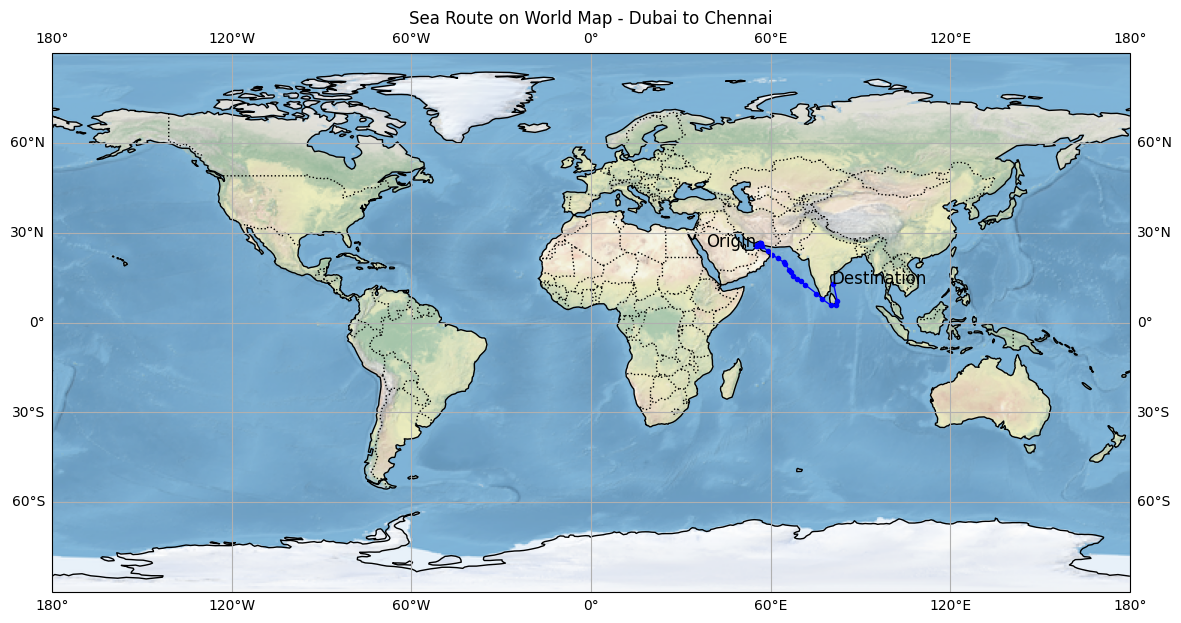

In [40]:
import searoute as sr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import shape

# Define origin and destination
origin = [55.30, 25.266667]                    # Dubayy - United Arab Emirates
destination = [80.300000, 13.100000]                # Chennai - India East coast

# Get sea route (GeoJSON LineString)
route = sr.searoute(origin, destination)

# Convert to shapely LineString
line = shape(route["geometry"])
lons, lats = line.xy

# Create a map
fig = plt.figure(figsize=(14, 7))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.stock_img()
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True)

# Plot the route
ax.plot(lons, lats, color='blue', linewidth=1, marker='o', markersize=3, transform=ccrs.Geodetic())

# Annotate start and end
ax.text(origin[0], origin[1], 'Origin', transform=ccrs.PlateCarree(), fontsize=12, ha='right')
ax.text(destination[0], destination[1], 'Destination', transform=ccrs.PlateCarree(), fontsize=12, ha='left')

plt.title("Sea Route on World Map - Dubai to Chennai")
plt.show()

### Maurer (USA) to Mandvi (India)

In [38]:
import searoute as sr

origin = [-74.250000, 40.533333]                    # Maurer - United States East coast
destination = [69.350000, 22.833333]                # Mandvi - India West coast

route = sr.searoute(origin, destination)
# > Returns a GeoJSON LineString Feature
# show route distance with unit
print("{:.1f} {}".format(route.properties['length'], route.properties['units']))

# Optionally, define the units for the length calculation included in the properties object.
# Defaults to km, can be can be 'm' = meters 'mi = miles 'ft' = feet 'in' = inches 'deg' = degrees
# 'cen' = centimeters 'rad' = radians 'naut' = nautical 'yd' = yards
routeMiles = sr.searoute(origin, destination, units="mi")

15008.5 km


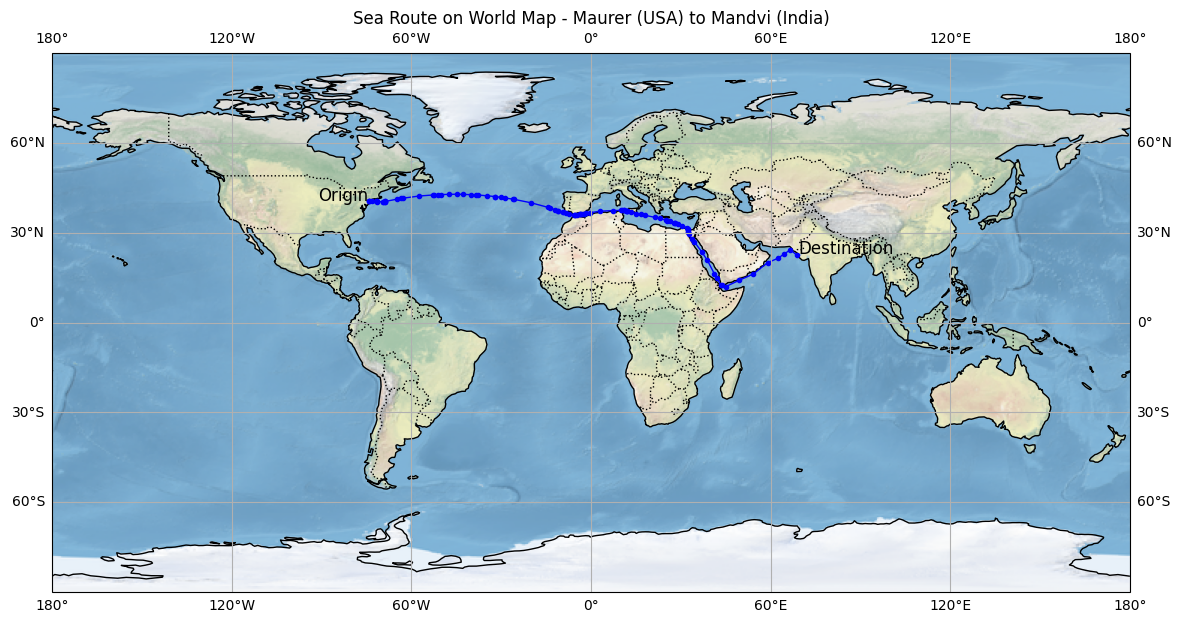

In [41]:
import searoute as sr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import shape
		
# Define origin and destination
origin = [-74.250000, 40.533333]                    # Maurer - United States East coast
destination = [69.350000, 22.833333]                # Mandvi - India West coast

# Get sea route (GeoJSON LineString)
route = sr.searoute(origin, destination)

# Convert to shapely LineString
line = shape(route["geometry"])
lons, lats = line.xy

# Create a map
fig = plt.figure(figsize=(14, 7))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.stock_img()
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True)

# Plot the route
ax.plot(lons, lats, color='blue', linewidth=1, marker='o', markersize=3, transform=ccrs.Geodetic())

# Annotate start and end
ax.text(origin[0], origin[1], 'Origin', transform=ccrs.PlateCarree(), fontsize=12, ha='right')
ax.text(destination[0], destination[1], 'Destination', transform=ccrs.PlateCarree(), fontsize=12, ha='left')

plt.title("Sea Route on World Map - Maurer (USA) to Mandvi (India)")
plt.show()

### Near English Channel to Near China Sea

In [39]:
import searoute as sr

origin = [0.3515625, 50.064191736659104]         # Near English Channel
destination = [117.42187500000001, 39.36827914916014]  # Near China Sea

route = sr.searoute(origin, destination)
# > Returns a GeoJSON LineString Feature
# show route distance with unit
print("{:.1f} {}".format(route.properties['length'], route.properties['units']))

# Optionally, define the units for the length calculation included in the properties object.
# Defaults to km, can be can be 'm' = meters 'mi = miles 'ft' = feet 'in' = inches 'deg' = degrees
# 'cen' = centimeters 'rad' = radians 'naut' = nautical 'yd' = yards
routeMiles = sr.searoute(origin, destination, units="mi")

20385.5 km


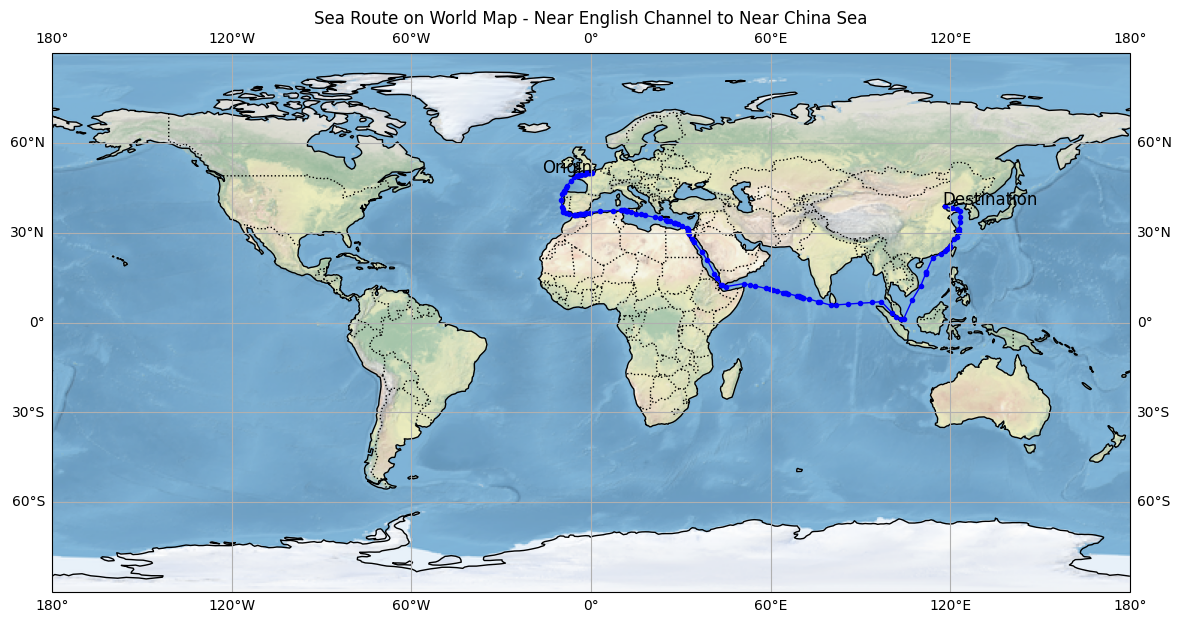

In [42]:
import searoute as sr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import shape

# Define origin and destination
origin = [0.3515625, 50.064191736659104]         # Near English Channel
destination = [117.42187500000001, 39.36827914916014]  # Near China Sea

# Get sea route (GeoJSON LineString)
route = sr.searoute(origin, destination)

# Convert to shapely LineString
line = shape(route["geometry"])
lons, lats = line.xy

# Create a map
fig = plt.figure(figsize=(14, 7))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.stock_img()
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True)

# Plot the route
ax.plot(lons, lats, color='blue', linewidth=1, marker='o', markersize=3, transform=ccrs.Geodetic())

# Annotate start and end
ax.text(origin[0], origin[1], 'Origin', transform=ccrs.PlateCarree(), fontsize=12, ha='right')
ax.text(destination[0], destination[1], 'Destination', transform=ccrs.PlateCarree(), fontsize=12, ha='left')

plt.title("Sea Route on World Map - Near English Channel to Near China Sea")
plt.show()
